
# Customer Churn Prediction

This notebook aims to predict customer churn using machine learning techniques. The steps include:
- Data Exploration and Preprocessing
- Feature Engineering
- Model Training and Hyperparameter Tuning
- Evaluation and Interpretation
- Final Predictions


In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [3]:
# Load the dataset
customer_data = pd.read_csv('Customer_data.csv')

# Display basic information and the first few rows
print("Dataset Overview:")
print(customer_data.info())
print("First 5 rows:")
print(customer_data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


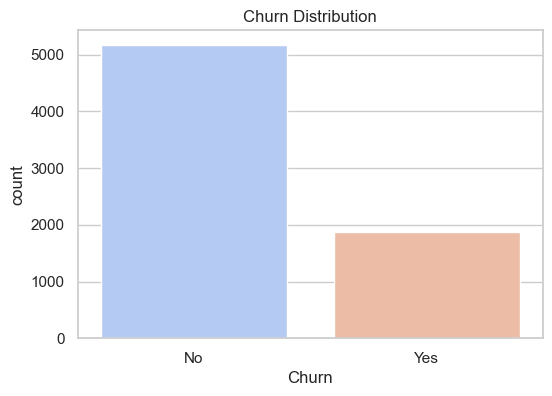

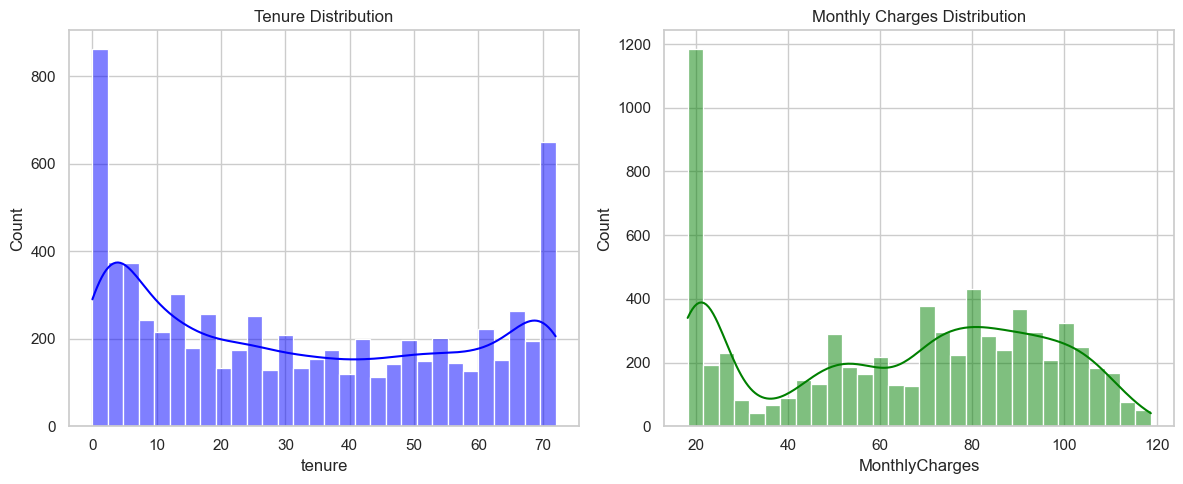

In [4]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("Summary Statistics:")
print(customer_data.describe())

# Visualizing Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=customer_data, x='Churn', palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

# Examining tenure and MonthlyCharges distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(customer_data['tenure'], kde=True, bins=30, color='blue')
plt.title("Tenure Distribution")

plt.subplot(1, 2, 2)
sns.histplot(customer_data['MonthlyCharges'], kde=True, bins=30, color='green')
plt.title("Monthly Charges Distribution")
plt.tight_layout()
plt.show()


In [5]:
# Data Preprocessing

# Check for missing values
print("Missing Values:")
print(customer_data.isnull().sum())

# Impute missing TotalCharges with mean
imputer = SimpleImputer(strategy='mean')
customer_data['TotalCharges'] = imputer.fit_transform(customer_data[['TotalCharges']])

# Encode categorical variables using one-hot encoding
customer_data = pd.get_dummies(customer_data, drop_first=True)

# Confirm no missing values remain
print("Missing Values After Imputation:")
print(customer_data.isnull().sum())


Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Missing Values After Imputation:
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes                

In [6]:
# Splitting features and target
X = customer_data.drop(['Churn_Yes'], axis=1)
y = customer_data['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


In [7]:
# Hyperparameter Tuning and Model Training
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV to find the best parameters
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Final model training
best_rf = grid_search.best_estimator_
best_rf.fit(X_res, y_res)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(random_state=42)

Accuracy: 0.8020
ROC-AUC Score: 0.8516
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1036
        True       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



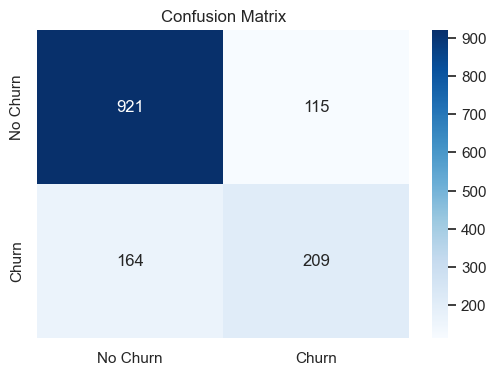

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  15.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  40.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  21.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estima

In [8]:
# Evaluation on test data
y_pred = best_rf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Classification Report:")
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.show()
